In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('cancer_data.csv')

In [3]:
data.shape

(569, 33)

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [8]:
#pd.set_option('display.max_columns', None)

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])

In [10]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [11]:
del_cols = ['id','Unnamed: 32']
data.drop(del_cols, axis = 1,inplace = True)

In [12]:
#sns.pairplot(data)

In [13]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
data.dtypes

diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [15]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [16]:
feature_labels = list(data.columns[1:30])
#feature_labels

In [17]:
#corr = data[feature_labels].corr()
#plt.figure(figsize=(14,14))
#sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws={'size': 15},
#           xticklabels = feature_labels, yticklabels = feature_labels, cmap= 'coolwarm')

In [18]:
#from sklearn.model_selection import train_test_split

#train, test = train_test_split(data, test_size = 0.3, random_state = 30)

In [19]:
#x_train = train.iloc[:, 1:]
#x_test  = test.iloc[:, 1:]

In [20]:
#x_train

In [21]:
#y_train = train.iloc[:, 0]
#y_test  = test.iloc[:, 0]

In [22]:
#y_train

In [23]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.feature_selection import SelectFromModel

#clf = RandomForestClassifier()
#clf.fit(x_train, y_train)

#for feature in sorted(zip(feature_labels, clf.feature_importances_), key = lambda x: x[1], reverse = True):
#    print(feature)

In [24]:
feature_cols = ['concave points_worst','radius_worst','concavity_mean','perimeter_worst','concave points_mean','area_se',
                'concavity_worst','area_worst','texture_worst','texture_mean','texture_se']

x = data[feature_cols]
y = data.diagnosis

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=5)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [28]:
all_accuracies

array([0.975     , 0.925     , 0.975     , 0.93670886, 0.93670886])

In [29]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(x_train,y_train)

#Prediction
#y_pred=model.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
model.predict_proba(x_test)

array([[3.15578582e-03, 9.96844214e-01],
       [7.30529683e-02, 9.26947032e-01],
       [9.91163452e-01, 8.83654820e-03],
       [3.75700154e-01, 6.24299846e-01],
       [9.92116314e-01, 7.88368594e-03],
       [2.61854982e-11, 1.00000000e+00],
       [9.77488862e-01, 2.25111377e-02],
       [9.99521025e-01, 4.78975165e-04],
       [9.94117712e-01, 5.88228760e-03],
       [9.87529456e-01, 1.24705442e-02],
       [9.72334385e-01, 2.76656152e-02],
       [9.38234768e-09, 9.99999991e-01],
       [9.95863164e-01, 4.13683589e-03],
       [3.68237774e-02, 9.63176223e-01],
       [2.14086082e-10, 1.00000000e+00],
       [6.47314018e-01, 3.52685982e-01],
       [2.66835284e-03, 9.97331647e-01],
       [2.22044605e-16, 1.00000000e+00],
       [9.94108524e-01, 5.89147573e-03],
       [9.99997089e-01, 2.91051334e-06],
       [9.34915432e-01, 6.50845680e-02],
       [9.97045449e-01, 2.95455064e-03],
       [3.03737060e-08, 9.99999970e-01],
       [1.59105023e-01, 8.40894977e-01],
       [9.500520

In [31]:
x_pred=(model.predict_proba(x_train)[:,1]>=0.3)*1

In [32]:
from sklearn import metrics
metrics.roc_auc_score(y_train, x_pred)

0.9544892473118279

In [33]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, x_pred)
cnf_matrix

array([[237,  11],
       [  7, 143]], dtype=int64)

In [34]:
model.predict(x_train)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,

In [35]:
crosstab = pd.crosstab(index=y_train, columns=x_pred)

crosstab = crosstab.rename(columns = {0: 'Non-cancer', 1:'Cancer'})

crosstab.index = ['Non-cancer','Cancer']

crosstab.columns.name = 'Diagnosis'

crosstab

Diagnosis,Non-cancer,Cancer
Non-cancer,237,11
Cancer,7,143


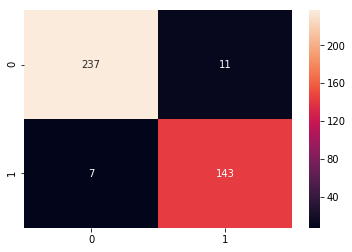

In [36]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')

In [37]:
print("Accuracy:",metrics.accuracy_score(y_train, x_pred))
print("Precision:",metrics.precision_score(y_train, x_pred))
print("Recall:",metrics.recall_score(y_train, x_pred))

Accuracy: 0.9547738693467337
Precision: 0.9285714285714286
Recall: 0.9533333333333334


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       248
           1       0.93      0.95      0.94       150

   micro avg       0.95      0.95      0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398

